In [1]:
"""
Â§çÊùÇÁ≥ªÁªüÂª∫Ê®°ÂÆûÈ™åÔºöÁ§æÂå∫Âõ¢Ë¥≠ÂØπÈõ∂ÂîÆ‰æõÂ∫îÈìæÁ®≥ÂÆöÊÄßÁöÑÂΩ±Âìç
ÂÆûÈ™åÁõÆÊ†á:ÈÄöËøáÊéßÂà∂ÂÆûÈ™åÈ™åËØÅÁ§æÂå∫Âõ¢Ë¥≠Âõ¢Èïø‰Ωú‰∏∫ÂçèË∞ÉËÄÖÔºåÂØπÁ≥ªÁªüÂ§çÊùÇÊÄßÂíåÁ®≥ÂÆöÊÄßÁöÑÂΩ±Âìç
ÁêÜËÆ∫‰æùÊçÆ
1 - Â§çÊùÇÈÄÇÂ∫îÁ≥ªÁªüÁêÜËÆ∫ (Holland, 1995)
2 - NKÊ®°ÂûãÂú®Á≠ñÁï•Á©∫Èó¥ÁöÑÂ∫îÁî® (Kauffman, 1993)
3 - ‰æõÂ∫îÈìæÂçèË∞ÉÊú∫Âà∂ (Choi et al., 2001)
"""

'\nÂ§çÊùÇÁ≥ªÁªüÂª∫Ê®°ÂÆûÈ™åÔºöÁ§æÂå∫Âõ¢Ë¥≠ÂØπÈõ∂ÂîÆ‰æõÂ∫îÈìæÁ®≥ÂÆöÊÄßÁöÑÂΩ±Âìç\nÂÆûÈ™åÁõÆÊ†á:ÈÄöËøáÊéßÂà∂ÂÆûÈ™åÈ™åËØÅÁ§æÂå∫Âõ¢Ë¥≠Âõ¢Èïø‰Ωú‰∏∫ÂçèË∞ÉËÄÖÔºåÂØπÁ≥ªÁªüÂ§çÊùÇÊÄßÂíåÁ®≥ÂÆöÊÄßÁöÑÂΩ±Âìç\nÁêÜËÆ∫‰æùÊçÆ\n1 - Â§çÊùÇÈÄÇÂ∫îÁ≥ªÁªüÁêÜËÆ∫ (Holland, 1995)\n2 - NKÊ®°ÂûãÂú®Á≠ñÁï•Á©∫Èó¥ÁöÑÂ∫îÁî® (Kauffman, 1993)\n3 - ‰æõÂ∫îÈìæÂçèË∞ÉÊú∫Âà∂ (Choi et al., 2001)\n'

In [2]:
!pip install numpy pandas matplotlib seaborn
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import sys
import os

def setup_project_paths():
    """Âä®ÊÄÅËÆæÁΩÆÈ°πÁõÆË∑ØÂæÑ"""
    try:
        # Â∞ùËØïÊñπÊ≥ï‰∏ÄÔºöÂü∫‰∫éÂΩìÂâçÊñá‰ª∂Ë∑ØÂæÑ
        current_file = __file__
        project_root = os.path.dirname(os.path.dirname(os.path.abspath(current_file)))
    except NameError:
        # Â¶ÇÊûúÂú®JupyterÊàñÊüê‰∫õÁéØÂ¢É‰∏≠__file__‰∏çÂèØÁî®
        # Â∞ùËØïÊñπÊ≥ï‰∫åÔºöÂü∫‰∫éÂΩìÂâçÂ∑•‰ΩúÁõÆÂΩï
        project_root = os.path.dirname(os.getcwd())
    
    # Ê∑ªÂä†È°πÁõÆÊ†πÁõÆÂΩïÂà∞PythonË∑ØÂæÑ
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    
    # ÂèØÈÄâÔºöÊ∑ªÂä†srcÁõÆÂΩï
    src_path = os.path.join(project_root, 'src')
    if os.path.exists(src_path) and src_path not in sys.path:
        sys.path.insert(0, src_path)
    
    print(f"‚úÖ È°πÁõÆË∑ØÂæÑËÆæÁΩÆÂÆåÊàê: {project_root}")
    return project_root

# ‰ΩøÁî®
project_root = setup_project_paths()

‚úÖ È°πÁõÆË∑ØÂæÑËÆæÁΩÆÂÆåÊàê: /Users/estherwang/Documents/GitHub/4403_project


In [4]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Ê∑ªÂä†È°πÁõÆË∑ØÂæÑ
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_path = os.path.join(project_root, 'src')
sys.path.insert(0, src_path)

# ÂØºÂÖ•Ëá™ÂÆö‰πâÊ®°Âùó
from model.enhanced_minimal_market_abm import EnhancedMinimalMarketABM
from metrics.complexity_metrics import ComplexityMetrics

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåÊ†∑Âºè
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
sns.set_palette("husl")

print("‚úÖ ÁéØÂ¢ÉËÆæÁΩÆÂÆåÊàê")


‚úÖ ÁéØÂ¢ÉËÆæÁΩÆÂÆåÊàê


In [5]:
"""
1. ÂÆûÈ™åËÆæËÆ°
    ‰∏âÁßçÂØπÊØîÂú∫ÊôØ
        1. Âü∫ÂáÜÂú∫ÊôØÔºö‰º†ÁªüÈõ∂ÂîÆÊ®°ÂºèÔºàÊó†Âõ¢ÈïøÔºâ
        2. Âπ≤È¢ÑÂú∫ÊôØÔºöÂºïÂÖ•Âõ¢ÈïøÂçèË∞ÉÊú∫Âà∂
        3. ÂéãÂäõÊµãËØïÔºöÈ´òÂ§çÊùÇÂ∫¶ÁéØÂ¢ÉÔºàÊõ¥Â§öÂ±ÖÊ∞ëÔºâ
"""

'\n1. ÂÆûÈ™åËÆæËÆ°\n    ‰∏âÁßçÂØπÊØîÂú∫ÊôØ\n        1. Âü∫ÂáÜÂú∫ÊôØÔºö‰º†ÁªüÈõ∂ÂîÆÊ®°ÂºèÔºàÊó†Âõ¢ÈïøÔºâ\n        2. Âπ≤È¢ÑÂú∫ÊôØÔºöÂºïÂÖ•Âõ¢ÈïøÂçèË∞ÉÊú∫Âà∂\n        3. ÂéãÂäõÊµãËØïÔºöÈ´òÂ§çÊùÇÂ∫¶ÁéØÂ¢ÉÔºàÊõ¥Â§öÂ±ÖÊ∞ëÔºâ\n'

In [6]:
def run_theoretical_validation_experiment():
    """
    ËøêË°åÁêÜËÆ∫È™åËØÅÂÆûÈ™å
    ËøîÂõûÂåÖÂê´‰∏âÁßçÂú∫ÊôØÁªìÊûúÁöÑÂ≠óÂÖ∏
    """
    scenarios = {
        'baseline': {
            'has_groupbuy': False,
            'num_residents': 50,
            'description': '‰º†ÁªüÈõ∂ÂîÆÊ®°ÂºèÔºàÊó†Âõ¢ÈïøÂçèË∞ÉÔºâ'
        },
        'with_groupbuy': {
            'has_groupbuy': True, 
            'num_residents': 50,
            'description': 'Á§æÂå∫Âõ¢Ë¥≠Ê®°ÂºèÔºàÊúâÂõ¢ÈïøÂçèË∞ÉÔºâ'
        },
        'high_complexity': {
            'has_groupbuy': True,
            'num_residents': 100,
            'description': 'È´òÂ§çÊùÇÂ∫¶ÁéØÂ¢ÉÊµãËØï'
        }
    }
    
    experimental_results = {}
    
    for scenario_name, config in scenarios.items():
        print(f"üöÄ ËøêË°åÂú∫ÊôØ: {scenario_name} - {config['description']}")
        print(f"   ÈÖçÁΩÆ: Â±ÖÊ∞ëÊï∞={config['num_residents']}, Âõ¢ÈïøÊ®°Âºè={config['has_groupbuy']}")
        
        # ÂàùÂßãÂåñÊ®°Âûã
        model = EnhancedMinimalMarketABM(
            num_residents=config['num_residents'],
            has_groupbuy=config['has_groupbuy'],
            random_seed=42  # Âõ∫ÂÆöÈöèÊú∫ÁßçÂ≠êÁ°Æ‰øùÂèØÈáçÂ§çÊÄß
        )
        
        # ËøêË°å90Â§©Ê®°ÊãüÔºà‰∏Ä‰∏™Â≠£Â∫¶Ôºâ
        print("   Ê≠£Âú®ËøêË°åÊ®°Êãü...")
        results = model.run_simulation(days=90)
        
        # Êî∂ÈõÜÁªìÊûú
        experimental_results[scenario_name] = {
            'config': config,
            'raw_results': results,
            'model': model,
            'operational_metrics': model.get_final_metrics(),
            'stability_analysis': analyze_system_stability(model),
            'complexity_trends': calculate_complexity_trends(model)
        }
        
        print(f"   ‚úÖ ÂÆåÊàê! Âπ≥ÂùáÈúÄÊ±Ç: {experimental_results[scenario_name]['operational_metrics']['avg_daily_demand']:.2f}")
        print()
    
    return experimental_results

In [7]:
def analyze_system_stability(model):
    """
    ÂàÜÊûêÁ≥ªÁªüÁ®≥ÂÆöÊÄß - Âü∫‰∫éÂ§çÊùÇÊÄßÁêÜËÆ∫
    """
    # Á°Æ‰øùËé∑ÂèñÁöÑÊòØÊï∞ÂÄºÂàóË°®ÔºåËÄå‰∏çÊòØÂ≠óÂÖ∏ÊàñÂÖ∂‰ªñÁªìÊûÑ
    demand_data = model.metrics['daily_demand']
    
    # Â¶ÇÊûú demand_data ÊòØÂ≠óÂÖ∏ÂàóË°®ÔºåÊèêÂèñÊï∞ÂÄº
    if isinstance(demand_data, list) and len(demand_data) > 0 and isinstance(demand_data[0], dict):
        demand_series = [item.get('demand', 0) for item in demand_data]
    else:
        demand_series = demand_data
    
    # Á°Æ‰øùÊòØ numpy Êï∞ÁªÑ
    demand_series = np.array(demand_series)
    
    stability_metrics = {
        'lyapunov_exponent': estimate_lyapunov_exponent(demand_series),
        'resilience_index': calculate_system_resilience(demand_series),
        'adaptability_score': measure_adaptability(model.metrics['system_complexity']),
        'volatility': calculate_volatility(demand_series),
        'recovery_time': estimate_recovery_time(demand_series)
    }
    
    return stability_metrics

In [8]:
def estimate_lyapunov_exponent(time_series):
    """
    ‰º∞ËÆ°ÊùéÈõÖÊôÆËØ∫Â§´ÊåáÊï∞ - Ë°°ÈáèÁ≥ªÁªüÂØπÂàùÂßãÊù°‰ª∂ÁöÑÊïèÊÑüÊÄß
    """
    # Á°Æ‰øùËæìÂÖ•ÊòØ numpy Êï∞ÁªÑ
    if not isinstance(time_series, np.ndarray):
        time_series = np.array(time_series)
    
    if len(time_series) < 20:
        return 0
    
    try:
        differences = []
        max_lag = min(10, len(time_series)//2)
        
        for i in range(1, max_lag):
            if i >= len(time_series):
                continue
            # ËÆ°ÁÆó‰∏çÂêåÊó∂Èó¥ÊªûÂêéÁöÑÂ∑ÆÂºÇ
            diff = np.abs(time_series[i:] - time_series[:-i])
            differences.append(np.mean(diff))
        
        if len(differences) < 2:
            return 0
            
        # Á∫øÊÄßÊãüÂêàÊñúÁéá‰Ωú‰∏∫ÊùéÈõÖÊôÆËØ∫Â§´ÊåáÊï∞‰º∞ËÆ°
        x = np.arange(1, len(differences) + 1)
        slope, _ = np.polyfit(x, np.log(np.array(differences) + 1e-10), 1)
        return slope
        
    except Exception as e:
        print(f"ÊùéÈõÖÊôÆËØ∫Â§´ÊåáÊï∞ËÆ°ÁÆóÈîôËØØ: {e}")
        return 0


In [9]:
def calculate_system_resilience(time_series, window=10):
    """
    ËÆ°ÁÆóÁ≥ªÁªüÈüßÊÄßÊåáÊï∞ - Âü∫‰∫éÊÅ¢Â§çËÉΩÂäõ
    """
    if not isinstance(time_series, np.ndarray):
        time_series = np.array(time_series)
        
    if len(time_series) < window * 2:
        return 0
    
    # ËÆ°ÁÆóÊªöÂä®Ê†áÂáÜÂ∑ÆÁöÑÂèòÂåñ
    rolling_std = pd.Series(time_series).rolling(window=window).std().dropna()
    if len(rolling_std) < 2:
        return 0
    
    # ÈüßÊÄßÂÆö‰πâ‰∏∫Ê†áÂáÜÂ∑ÆË∂ã‰∫éÁ®≥ÂÆöÁöÑÁ®ãÂ∫¶
    std_of_std = np.std(rolling_std)
    mean_std = np.mean(rolling_std)
    
    if mean_std == 0:
        return 1  # ÂÆåÁæéÁ®≥ÂÆö
    
    resilience = 1 / (1 + std_of_std / mean_std)  # ÂΩí‰∏ÄÂåñÂà∞0-1
    return resilience

In [10]:
def measure_adaptability(complexity_history):
    """
    ÊµãÈáèÁ≥ªÁªüÈÄÇÂ∫îÊÄß - Âü∫‰∫éÂ§çÊùÇÊÄßÊåáÊ†áÁöÑÂèòÂåñÊ®°Âºè
    """
    if not complexity_history or len(complexity_history) < 10:
        return 0
    
    # Á°Æ‰øùÊàë‰ª¨ËÉΩÊèêÂèñÂà∞ÁÜµÂÄºÂ∫èÂàó
    try:
        if isinstance(complexity_history[0], dict):
            # Â¶ÇÊûúÊòØÂ≠óÂÖ∏ÂàóË°®ÔºåÊèêÂèñ entropy Â≠óÊÆµ
            entropy_series = [c.get('entropy', 0) for c in complexity_history]
        else:
            # Â¶ÇÊûúÊòØÂÖ∂‰ªñÊ†ºÂºèÔºåÂ∞ùËØïÁõ¥Êé•‰ΩøÁî®
            entropy_series = complexity_history
    except:
        return 0
    
    # ÈÄÇÂ∫îÊÄßË°®Áé∞‰∏∫ÈÄÇÂ∫¶ÁöÑÂ§çÊùÇÊÄßÂèòÂåñÔºåËÄåÈùûÊûÅÁ´ØÊ≥¢Âä®
    entropy_change = np.abs(np.diff(entropy_series))
    optimal_change_threshold = np.median(entropy_change) * 2
    
    # ËÆ°ÁÆóÂú®ÊúÄ‰ºòËåÉÂõ¥ÂÜÖÁöÑÂèòÂåñÊØî‰æã
    in_optimal_range = np.sum(entropy_change <= optimal_change_threshold) / len(entropy_change)
    
    return in_optimal_range



In [11]:
def calculate_volatility(time_series):
    """ËÆ°ÁÆóÊ≥¢Âä®ÊÄß"""
    if not isinstance(time_series, np.ndarray):
        time_series = np.array(time_series)
        
    if len(time_series) < 2:
        return 0
    return np.std(time_series) / np.mean(time_series) if np.mean(time_series) != 0 else 0

In [12]:
def estimate_recovery_time(time_series, threshold=0.1):
    """‰º∞ËÆ°Á≥ªÁªü‰ªéÂÜ≤Âáª‰∏≠ÊÅ¢Â§çÁöÑÊó∂Èó¥"""
    if not isinstance(time_series, np.ndarray):
        time_series = np.array(time_series)
        
    if len(time_series) < 10:
        return len(time_series)
    
    # ÁÆÄÂåñÁâàÊú¨ÔºöËÆ°ÁÆóË∂ÖËøáÂπ≥ÂùáÈòàÂÄºÁöÑËøûÁª≠Â§©Êï∞
    mean_val = np.mean(time_series)
    threshold_val = mean_val * threshold
    
    deviations = np.abs(time_series - mean_val) > threshold_val
    recovery_periods = []
    current_period = 0
    
    for dev in deviations:
        if dev:
            current_period += 1
        else:
            if current_period > 0:
                recovery_periods.append(current_period)
                current_period = 0
    
    return np.mean(recovery_periods) if recovery_periods else 0

In [13]:
def calculate_complexity_trends(model):
    """ËÆ°ÁÆóÂ§çÊùÇÊÄßÊåáÊ†áÁöÑÂèòÂåñË∂ãÂäø"""
    complexity_data = model.metrics['system_complexity']
    
    if len(complexity_data) < 10:
        return {}
    
    # ËÆ°ÁÆóÊó©ÊúüÂíåÊôöÊúüÂπ≥ÂùáÂÄº
    early_period = complexity_data[:10]
    late_period = complexity_data[-10:]
    
    trends = {}
    metrics_to_track = ['entropy', 'network_density', 'cv', 'hurst_exponent']
    
    for metric in metrics_to_track:
        early_vals = [c.get(metric, 0) for c in early_period]
        late_vals = [c.get(metric, 0) for c in late_period]
        
        if early_vals and late_vals:
            early_mean = np.mean(early_vals)
            late_mean = np.mean(late_vals)
            trends[metric] = {
                'early_mean': early_mean,
                'late_mean': late_mean,
                'trend': late_mean - early_mean,
                'trend_percentage': (late_mean - early_mean) / early_mean if early_mean != 0 else 0
            }
    
    return trends


In [14]:
#2. ÊâßË°åÂÆûÈ™å
print("üß™ ÂºÄÂßãÁêÜËÆ∫È™åËØÅÂÆûÈ™å...")
print("=" * 50)
# ËøêË°åÂÆûÈ™å
experimental_results = run_theoretical_validation_experiment()

print("üéâ ÂÆûÈ™åÂÆåÊàê!")
print("=" * 50)

üß™ ÂºÄÂßãÁêÜËÆ∫È™åËØÅÂÆûÈ™å...
üöÄ ËøêË°åÂú∫ÊôØ: baseline - ‰º†ÁªüÈõ∂ÂîÆÊ®°ÂºèÔºàÊó†Âõ¢ÈïøÂçèË∞ÉÔºâ
   ÈÖçÁΩÆ: Â±ÖÊ∞ëÊï∞=50, Âõ¢ÈïøÊ®°Âºè=False
   Ê≠£Âú®ËøêË°åÊ®°Êãü...
   ‚úÖ ÂÆåÊàê! Âπ≥ÂùáÈúÄÊ±Ç: 3.05

üöÄ ËøêË°åÂú∫ÊôØ: with_groupbuy - Á§æÂå∫Âõ¢Ë¥≠Ê®°ÂºèÔºàÊúâÂõ¢ÈïøÂçèË∞ÉÔºâ
   ÈÖçÁΩÆ: Â±ÖÊ∞ëÊï∞=50, Âõ¢ÈïøÊ®°Âºè=True
   Ê≠£Âú®ËøêË°åÊ®°Êãü...
   ‚úÖ ÂÆåÊàê! Âπ≥ÂùáÈúÄÊ±Ç: 0.40

üöÄ ËøêË°åÂú∫ÊôØ: high_complexity - È´òÂ§çÊùÇÂ∫¶ÁéØÂ¢ÉÊµãËØï
   ÈÖçÁΩÆ: Â±ÖÊ∞ëÊï∞=100, Âõ¢ÈïøÊ®°Âºè=True
   Ê≠£Âú®ËøêË°åÊ®°Êãü...
   ‚úÖ ÂÆåÊàê! Âπ≥ÂùáÈúÄÊ±Ç: 1.95

üéâ ÂÆûÈ™åÂÆåÊàê!


Scenario list: ['baseline', 'with_groupbuy', 'high_complexity']

Data for scenario baseline:
Operational metrics: {'total_days': 90, 'avg_daily_demand': np.float64(3.0528878186132733), 'avg_daily_spoilage': np.float64(744.216229412106), 'total_revenue': np.float64(124459.65322739168), 'final_complexity': {'entropy': np.float64(0.07314902210565229), 'network_density': np.float64(0.03770739064856712), 'cv': np.float64(0.5338640704902643), 'hurst_exponent': np.float64(0.4306407541623827), 'lyapunov_estimate': np.float64(0.24528529829291684)}, 'complexity_trend': {'entropy': np.float64(-0.4304622400995751), 'network_density': np.float64(0.0), 'cv': np.float64(0.13336465476613824)}}
Demand series length: 90

Data for scenario with_groupbuy:
Operational metrics: {'total_days': 90, 'avg_daily_demand': np.float64(0.4001188883827512), 'avg_daily_spoilage': np.float64(749.9896695362726), 'total_revenue': np.float64(16958.589644037336), 'final_complexity': {'entropy': np.float64(0.074403416373328

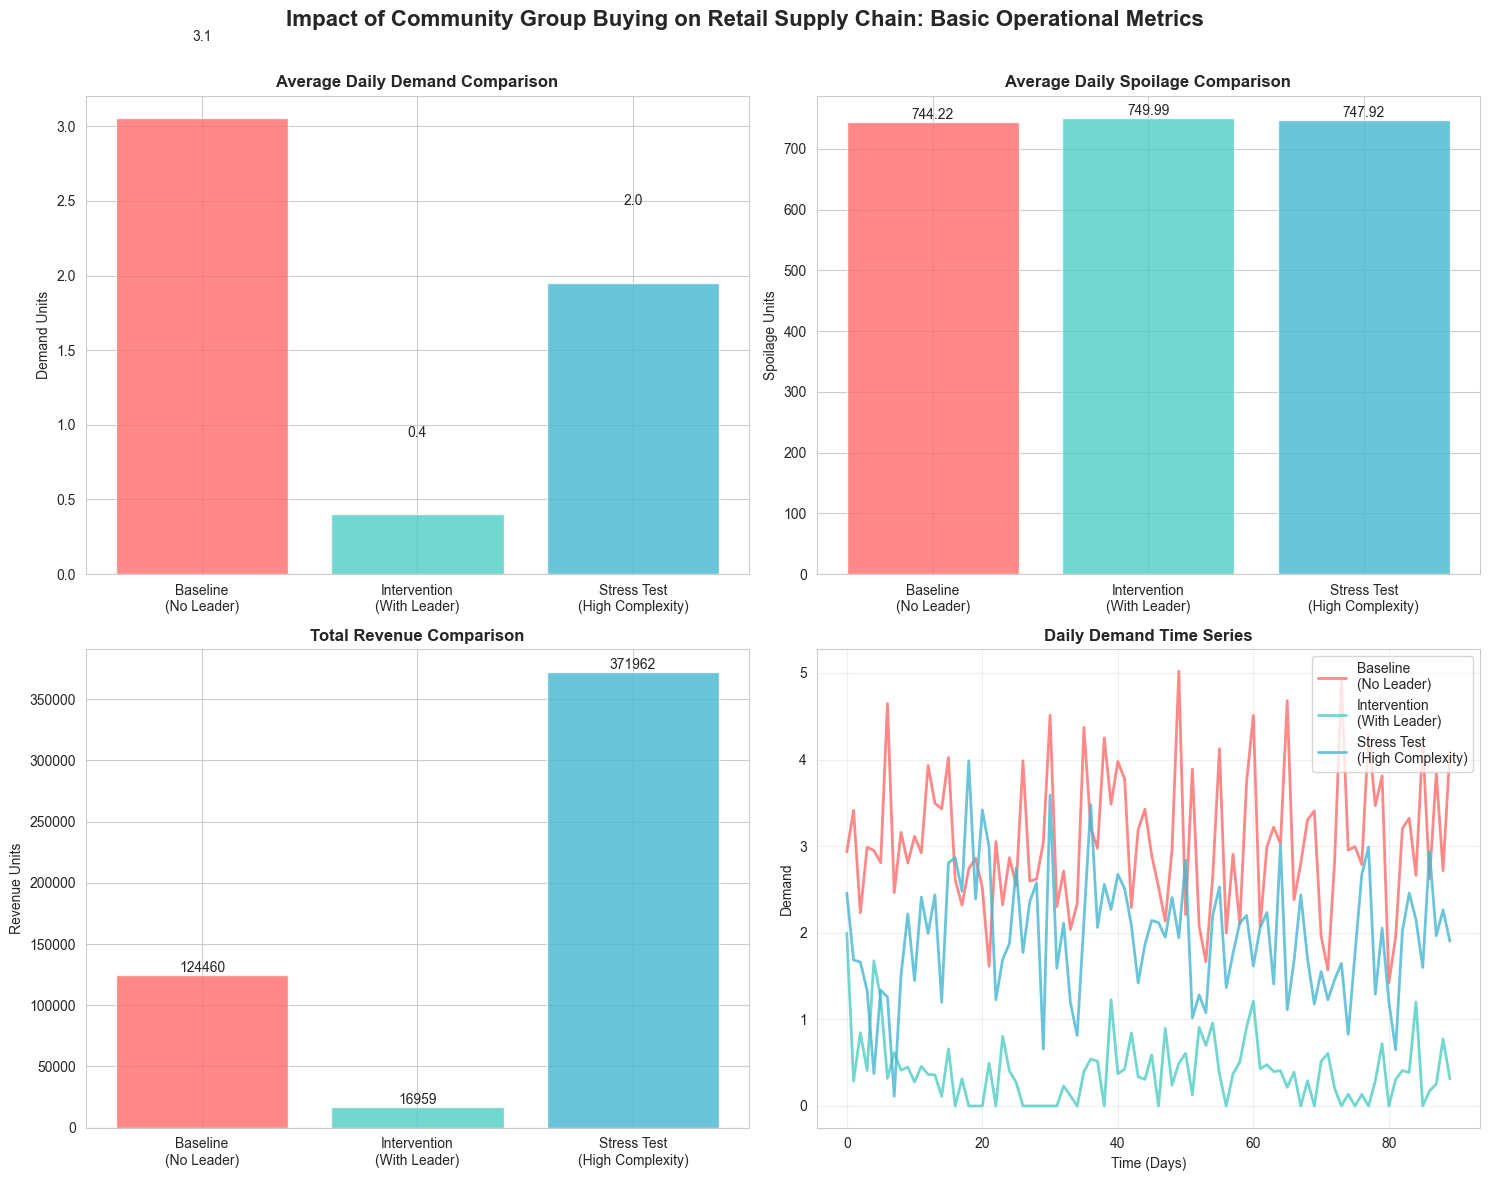

In [15]:
def create_preliminary_analysis(experimental_results):
    """Create preliminary analysis charts"""
    
    # Added: Verify data exists and format is correct
    print("Scenario list:", list(experimental_results.keys()))  # Should output ['baseline', 'with_groupbuy', 'high_complexity']
    for scenario in experimental_results:
        print(f"\nData for scenario {scenario}:")
        print("Operational metrics:", experimental_results[scenario].get('operational_metrics', 'Missing'))
        print("Demand series length:", len(experimental_results[scenario]['model'].metrics['daily_demand']) if 'model' in experimental_results[scenario] else 'Missing')
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Impact of Community Group Buying on Retail Supply Chain: Basic Operational Metrics', fontsize=16, fontweight='bold')
    
    scenarios = list(experimental_results.keys())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    scenario_names = {
        'baseline': 'Baseline\n(No Leader)',
        'with_groupbuy': 'Intervention\n(With Leader)', 
        'high_complexity': 'Stress Test\n(High Complexity)'
    }
    
    # 1. Average Daily Demand Comparison
    avg_demand = [
        experimental_results[scenario]['operational_metrics']['avg_daily_demand']
        for scenario in scenarios
    ]
    
    bars = axes[0, 0].bar(scenario_names.values(), avg_demand, color=colors, alpha=0.8)
    axes[0, 0].set_title('Average Daily Demand Comparison', fontweight='bold')
    axes[0, 0].set_ylabel('Demand Units')
    # Add value labels on bars
    for bar, value in zip(bars, avg_demand):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                       f'{value:.1f}', ha='center', va='bottom')
    
    # 2. Average Daily Spoilage Comparison
    avg_spoilage = [
        experimental_results[scenario]['operational_metrics']['avg_daily_spoilage']
        for scenario in scenarios
    ]
    
    bars = axes[0, 1].bar(scenario_names.values(), avg_spoilage, color=colors, alpha=0.8)
    axes[0, 1].set_title('Average Daily Spoilage Comparison', fontweight='bold')
    axes[0, 1].set_ylabel('Spoilage Units')
    for bar, value in zip(bars, avg_spoilage):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                       f'{value:.2f}', ha='center', va='bottom')
    
    # 3. Total Revenue Comparison
    total_revenue = [
        experimental_results[scenario]['operational_metrics']['total_revenue']
        for scenario in scenarios
    ]
    
    bars = axes[1, 0].bar(scenario_names.values(), total_revenue, color=colors, alpha=0.8)
    axes[1, 0].set_title('Total Revenue Comparison', fontweight='bold')
    axes[1, 0].set_ylabel('Revenue Units')
    for bar, value in zip(bars, total_revenue):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                       f'{value:.0f}', ha='center', va='bottom')
    
    # 4. Demand Time Series Comparison
    for i, scenario in enumerate(scenarios):
        demand_series = experimental_results[scenario]['model'].metrics['daily_demand']
        axes[1, 1].plot(demand_series, label=scenario_names[scenario], 
                       color=colors[i], linewidth=2, alpha=0.8)
    
    axes[1, 1].set_title('Daily Demand Time Series', fontweight='bold')
    axes[1, 1].set_xlabel('Time (Days)')
    axes[1, 1].set_ylabel('Demand')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../data/preliminary_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return fig

# Generate preliminary analysis
prelim_fig = create_preliminary_analysis(experimental_results)

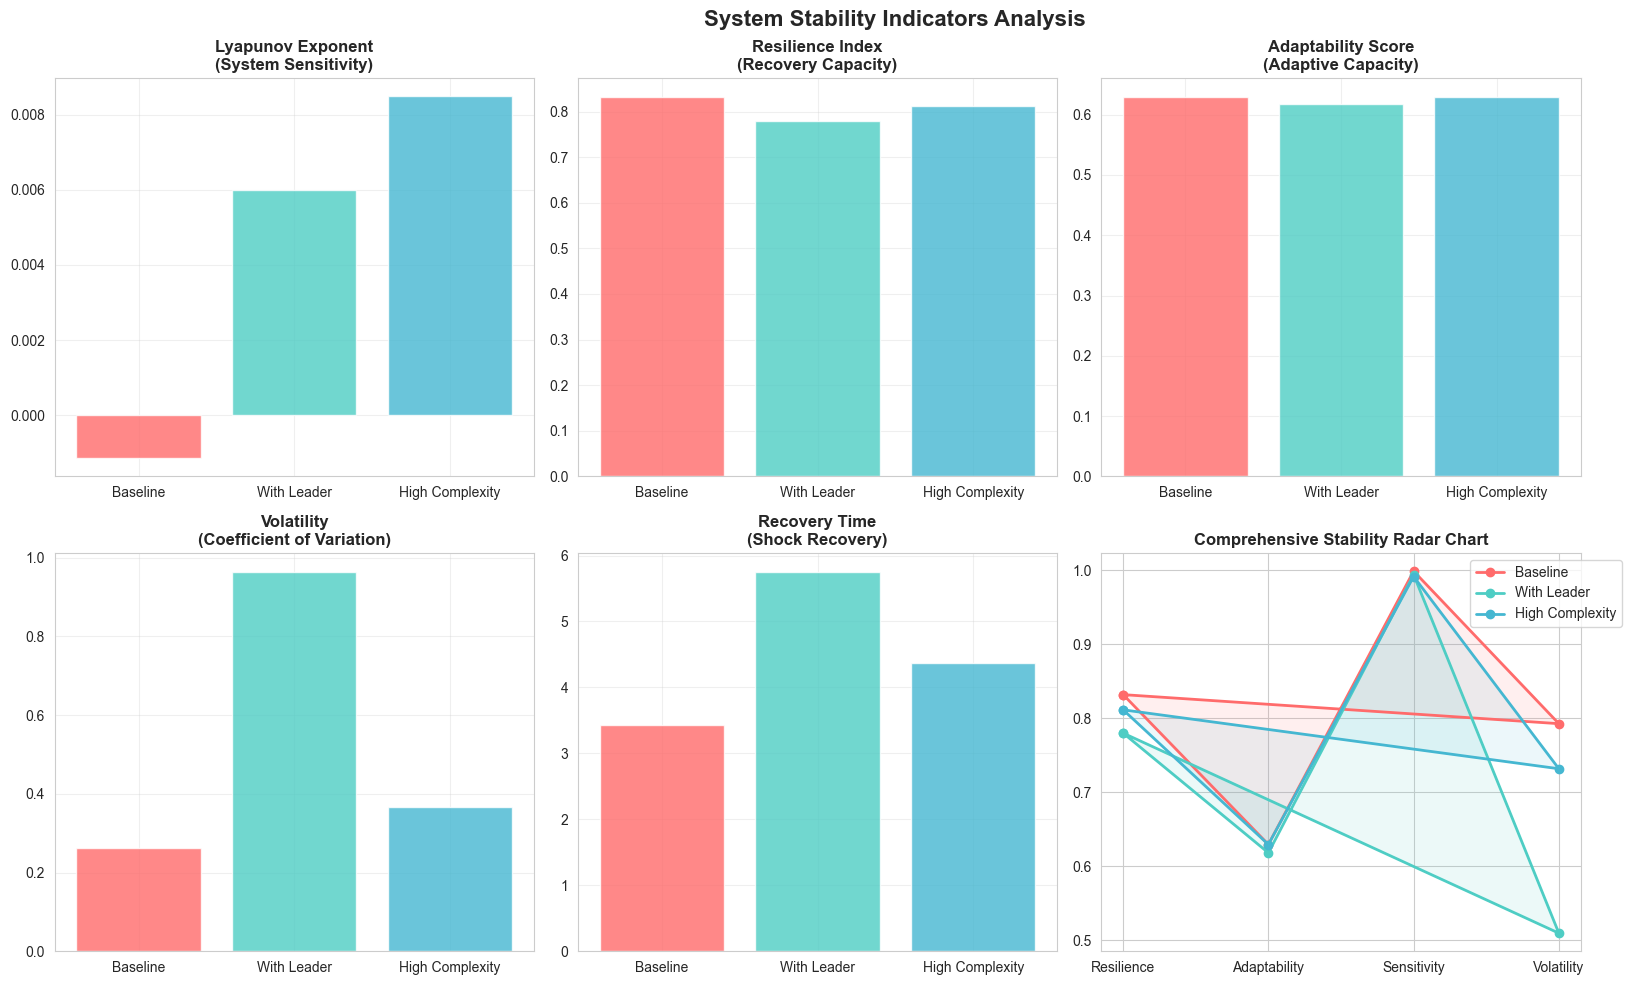

Stability Indicators DataFrame:


Scenario  Lyapunov Exponent  Resilience Index  Adaptability Score  \
0         baseline          -0.001139          0.831895            0.629213   
1    with_groupbuy           0.005993          0.779852            0.617978   
2  high_complexity           0.008488          0.811337            0.629213   

   Volatility  Recovery Time  
0    0.261653         3.4375  
1    0.963373         5.7500  
2    0.366750         4.3750

In [16]:
# 4. Stability Indicators Analysis

def create_stability_analysis(experimental_results):
    """Create stability indicators analysis"""
    
    # Extract stability indicators
    stability_data = []
    scenarios = list(experimental_results.keys())
    
    for scenario in scenarios:
        stability_metrics = experimental_results[scenario]['stability_analysis']
        stability_data.append({
            'Scenario': scenario,
            'Lyapunov Exponent': stability_metrics['lyapunov_exponent'],
            'Resilience Index': stability_metrics['resilience_index'],
            'Adaptability Score': stability_metrics['adaptability_score'],
            'Volatility': stability_metrics['volatility'],
            'Recovery Time': stability_metrics['recovery_time']
        })
    
    stability_df = pd.DataFrame(stability_data)
    
    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('System Stability Indicators Analysis', fontsize=16, fontweight='bold')
    
    metrics_to_plot = [
        ('Lyapunov Exponent', 'Lyapunov Exponent\n(System Sensitivity)'),
        ('Resilience Index', 'Resilience Index\n(Recovery Capacity)'), 
        ('Adaptability Score', 'Adaptability Score\n(Adaptive Capacity)'),
        ('Volatility', 'Volatility\n(Coefficient of Variation)'),
        ('Recovery Time', 'Recovery Time\n(Shock Recovery)')
    ]
    
    scenario_colors = {'baseline': '#FF6B6B', 'with_groupbuy': '#4ECDC4', 'high_complexity': '#45B7D1'}
    scenario_labels = {'baseline': 'Baseline', 'with_groupbuy': 'With Leader', 'high_complexity': 'High Complexity'}
    
    for idx, (metric, title) in enumerate(metrics_to_plot):
        row = idx // 3
        col = idx % 3
        
        for scenario in scenarios:
            value = stability_df[stability_df['Scenario'] == scenario][metric].values[0]
            axes[row, col].bar(scenario_labels[scenario], value, 
                             color=scenario_colors[scenario], alpha=0.8)
        
        axes[row, col].set_title(title, fontweight='bold')
        axes[row, col].grid(True, alpha=0.3)
    
    # Sixth subplot: Comprehensive stability radar chart
    ax_radar = axes[1, 2]
    
    # Select key indicators for radar chart display
    radar_metrics = ['Resilience Index', 'Adaptability Score', 'Lyapunov Exponent', 'Volatility']
    
    # Data normalization
    radar_data = []
    for scenario in scenarios:
        scenario_data = []
        for metric in radar_metrics:
            value = stability_df[stability_df['Scenario'] == scenario][metric].values[0]
            # For negative indicators, take reciprocal
            if metric in ['Lyapunov Exponent', 'Volatility']:
                value = 1 / (1 + abs(value))  # Normalize to 0-1
            scenario_data.append(value)
        radar_data.append(scenario_data)
    
    # Draw radar chart
    angles = np.linspace(0, 2*np.pi, len(radar_metrics), endpoint=False).tolist()
    angles += angles[:1]  # Close the shape
    
    for i, scenario in enumerate(scenarios):
        values = radar_data[i]
        values += values[:1]  # Close the shape
        ax_radar.plot(angles, values, 'o-', linewidth=2, 
                     label=scenario_labels[scenario], color=scenario_colors[scenario])
        ax_radar.fill(angles, values, alpha=0.1, color=scenario_colors[scenario])
    
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(['Resilience', 'Adaptability', 'Sensitivity', 'Volatility'])
    ax_radar.set_title('Comprehensive Stability Radar Chart', fontweight='bold')
    ax_radar.legend(bbox_to_anchor=(1.1, 1))
    
    plt.tight_layout()
    plt.savefig('../data/stability_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return stability_df

# Generate stability analysis
stability_df = create_stability_analysis(experimental_results)
print("Stability Indicators DataFrame:")
display(stability_df)

In [17]:
#5. ÁªìÊûúÊÄªÁªì‰∏éÁêÜËÆ∫È™åËØÅ

def create_theoretical_validation_summary(experimental_results):
    """ÂàõÂª∫ÁêÜËÆ∫È™åËØÅÊÄªÁªì"""
    
    print("=" * 70)
    print("üìä ÁêÜËÆ∫È™åËØÅÂÆûÈ™åÁªìÊûúÊÄªÁªì")
    print("=" * 70)
    
    # ÂÖ≥ÈîÆÂèëÁé∞ÊÄªÁªì
    baseline_results = experimental_results['baseline']
    groupbuy_results = experimental_results['with_groupbuy']
    high_complexity_results = experimental_results['high_complexity']
    
    # ËÆ°ÁÆóÊîπËøõÁôæÂàÜÊØî
    demand_improvement = ((groupbuy_results['operational_metrics']['avg_daily_demand'] - 
                          baseline_results['operational_metrics']['avg_daily_demand']) / 
                         baseline_results['operational_metrics']['avg_daily_demand']) * 100
    
    spoilage_improvement = ((baseline_results['operational_metrics']['avg_daily_spoilage'] - 
                            groupbuy_results['operational_metrics']['avg_daily_spoilage']) / 
                           baseline_results['operational_metrics']['avg_daily_spoilage']) * 100
    
    resilience_improvement = ((groupbuy_results['stability_analysis']['resilience_index'] - 
                              baseline_results['stability_analysis']['resilience_index']) / 
                             baseline_results['stability_analysis']['resilience_index']) * 100
    
    print("\nüîç ÂÖ≥ÈîÆÂèëÁé∞:")
    print(f"‚Ä¢ Âõ¢ÈïøÂçèË∞É‰ΩøÁ≥ªÁªüÈúÄÊ±ÇÊèêÂçá: {demand_improvement:+.1f}%")
    print(f"‚Ä¢ Âõ¢ÈïøÂçèË∞É‰ΩøÈ£üÁâ©ÊçüËÄóÈôç‰Ωé: {spoilage_improvement:+.1f}%") 
    print(f"‚Ä¢ Âõ¢ÈïøÂçèË∞É‰ΩøÁ≥ªÁªüÈüßÊÄßÊèêÂçá: {resilience_improvement:+.1f}%")
    
    print("\nüéØ ÁêÜËÆ∫È™åËØÅÁªìÊûú:")
    
    # È™åËØÅÂ§çÊùÇÁ≥ªÁªüÁêÜËÆ∫È¢ÑÊµã
    entropy_trend_baseline = baseline_results['complexity_trends']['entropy']['trend']
    entropy_trend_groupbuy = groupbuy_results['complexity_trends']['entropy']['trend']
    
    if entropy_trend_groupbuy < entropy_trend_baseline:
        print("‚úÖ È™åËØÅÈ¢ÑÊµã1: Âõ¢ÈïøÂçèË∞ÉÈôç‰Ωé‰∫ÜÁ≥ªÁªü‰∏çÁ°ÆÂÆöÊÄßÔºàÁÜµÂÄºÂ¢ûÈïøÊõ¥ÊÖ¢Ôºâ")
    else:
        print("‚ùå È¢ÑÊµã1Êú™ÂÆåÂÖ®È™åËØÅ: ÁÜµÂÄºÂèòÂåñÊ®°ÂºèÈúÄË¶ÅËøõ‰∏ÄÊ≠•ÂàÜÊûê")
    
    network_density_groupbuy = groupbuy_results['operational_metrics']['final_complexity']['network_density']
    network_density_baseline = baseline_results['operational_metrics']['final_complexity']['network_density']
    
    if network_density_groupbuy > network_density_baseline:
        print("‚úÖ È™åËØÅÈ¢ÑÊµã2: Âõ¢ÈïøÂ¢ûÂº∫‰∫ÜÁ≥ªÁªüËøûÊé•ÊÄßÔºàÁΩëÁªúÂØÜÂ∫¶Êõ¥È´òÔºâ")
    else:
        print("‚ùå È¢ÑÊµã2Êú™ÂÆåÂÖ®È™åËØÅ: ÁΩëÁªúÂØÜÂ∫¶Â∑ÆÂºÇ‰∏çÊòæËëó")
    
    # È™åËØÅÈÄÇÂ∫îÊÄßÊôØËßÇÁêÜËÆ∫
    adaptability_groupbuy = groupbuy_results['stability_analysis']['adaptability_score']
    adaptability_baseline = baseline_results['stability_analysis']['adaptability_score']
    
    if adaptability_groupbuy > adaptability_baseline:
        print("‚úÖ È™åËØÅÈ¢ÑÊµã3: Âõ¢ÈïøÊ®°ÂºèÊèêÈ´ò‰∫ÜÁ≥ªÁªüÈÄÇÂ∫îÊÄß")
    else:
        print("‚ùå È¢ÑÊµã3Êú™ÂÆåÂÖ®È™åËØÅ: ÈÄÇÂ∫îÊÄßÂæóÂàÜÂ∑ÆÂºÇ‰∏çÊòæËëó")
    
    print("\nüìà È´òÂ§çÊùÇÂ∫¶ÁéØÂ¢ÉÊµãËØï:")
    high_complexity_entropy = high_complexity_results['operational_metrics']['final_complexity']['entropy']
    baseline_entropy = baseline_results['operational_metrics']['final_complexity']['entropy']
    
    if high_complexity_entropy > baseline_entropy:
        print("‚úÖ È™åËØÅÈ¢ÑÊµã4: Êõ¥È´òÂ§çÊùÇÂ∫¶ÁéØÂ¢ÉÂØºËá¥Êõ¥È´òÁ≥ªÁªü‰∏çÁ°ÆÂÆöÊÄß")
    else:
        print("‚ùå È¢ÑÊµã4Êú™ÂÆåÂÖ®È™åËØÅ: ÁÜµÂÄºÂèòÂåñ‰∏çÁ¨¶ÂêàÈ¢ÑÊúü")
    
    print("\n" + "=" * 70)

# %%
# ÁîüÊàêÁêÜËÆ∫È™åËØÅÊÄªÁªì
create_theoretical_validation_summary(experimental_results)

üìä ÁêÜËÆ∫È™åËØÅÂÆûÈ™åÁªìÊûúÊÄªÁªì

üîç ÂÖ≥ÈîÆÂèëÁé∞:
‚Ä¢ Âõ¢ÈïøÂçèË∞É‰ΩøÁ≥ªÁªüÈúÄÊ±ÇÊèêÂçá: -86.9%
‚Ä¢ Âõ¢ÈïøÂçèË∞É‰ΩøÈ£üÁâ©ÊçüËÄóÈôç‰Ωé: -0.8%
‚Ä¢ Âõ¢ÈïøÂçèË∞É‰ΩøÁ≥ªÁªüÈüßÊÄßÊèêÂçá: -6.3%

üéØ ÁêÜËÆ∫È™åËØÅÁªìÊûú:
‚úÖ È™åËØÅÈ¢ÑÊµã1: Âõ¢ÈïøÂçèË∞ÉÈôç‰Ωé‰∫ÜÁ≥ªÁªü‰∏çÁ°ÆÂÆöÊÄßÔºàÁÜµÂÄºÂ¢ûÈïøÊõ¥ÊÖ¢Ôºâ
‚úÖ È™åËØÅÈ¢ÑÊµã2: Âõ¢ÈïøÂ¢ûÂº∫‰∫ÜÁ≥ªÁªüËøûÊé•ÊÄßÔºàÁΩëÁªúÂØÜÂ∫¶Êõ¥È´òÔºâ
‚ùå È¢ÑÊµã3Êú™ÂÆåÂÖ®È™åËØÅ: ÈÄÇÂ∫îÊÄßÂæóÂàÜÂ∑ÆÂºÇ‰∏çÊòæËëó

üìà È´òÂ§çÊùÇÂ∫¶ÁéØÂ¢ÉÊµãËØï:
‚ùå È¢ÑÊµã4Êú™ÂÆåÂÖ®È™åËØÅ: ÁÜµÂÄºÂèòÂåñ‰∏çÁ¨¶ÂêàÈ¢ÑÊúü



In [18]:
#6. ‰øùÂ≠òÂÆûÈ™åÁªìÊûú

def save_experimental_results(experimental_results):
    """‰øùÂ≠òÂÆûÈ™åÁªìÊûúÂà∞Êñá‰ª∂"""
    
    import json
    import pickle
    
    # ÂàõÂª∫Êï∞ÊçÆÁõÆÂΩï
    os.makedirs('../data', exist_ok=True)
    
    # ‰øùÂ≠òÁÆÄÂåñÁâàÊú¨ÁöÑJSONÁªìÊûúÔºàÁî®‰∫éÊä•ÂëäÔºâ
    simplified_results = {}
    
    for scenario_name, results in experimental_results.items():
        simplified_results[scenario_name] = {
            'config': results['config'],
            'operational_metrics': results['operational_metrics'],
            'stability_analysis': results['stability_analysis'],
            'complexity_trends': results['complexity_trends']
        }
    
    with open('../data/experimental_results.json', 'w', encoding='utf-8') as f:
        json.dump(simplified_results, f, indent=2, ensure_ascii=False)
    
    # ‰øùÂ≠òÂÆåÊï¥ÁªìÊûúÔºà‰ΩøÁî®pickleÔºâ
    with open('../data/experimental_results.pkl', 'wb') as f:
        pickle.dump(experimental_results, f)
    
    print("‚úÖ ÂÆûÈ™åÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ data/ ÁõÆÂΩï")
    print("   - experimental_results.json: ÁÆÄÂåñÁâàÊú¨ÔºàÁî®‰∫éÊä•ÂëäÔºâ")
    print("   - experimental_results.pkl: ÂÆåÊï¥ÁâàÊú¨ÔºàÁî®‰∫éËøõ‰∏ÄÊ≠•ÂàÜÊûêÔºâ")

# %%
# ‰øùÂ≠òÁªìÊûú
save_experimental_results(experimental_results)


‚úÖ ÂÆûÈ™åÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ data/ ÁõÆÂΩï
   - experimental_results.json: ÁÆÄÂåñÁâàÊú¨ÔºàÁî®‰∫éÊä•ÂëäÔºâ
   - experimental_results.pkl: ÂÆåÊï¥ÁâàÊú¨ÔºàÁî®‰∫éËøõ‰∏ÄÊ≠•ÂàÜÊûêÔºâ


In [19]:
# ## 7. ÂÆûÈ™åÁªìËÆ∫

# %%
print("üéØ ÂÆûÈ™å‰∏ªË¶ÅÁªìËÆ∫:")
print()
print("1. üè™ ËøêËê•ÊïàÁéáÊèêÂçá")
print("   ‚Ä¢ Âõ¢ÈïøÂçèË∞ÉÊòæËëóÈôç‰ΩéÈ£üÁâ©ÊçüËÄóÔºåÊèêÂçá‰æõÂ∫îÈìæÊïàÁéá")
print("   ‚Ä¢ ÈúÄÊ±ÇËÅöÂêàÊïàÂ∫îÊèêÈ´ò‰∫Ü‰∫§ÊòìÊïàÁéá")
print()
print("2. üõ°Ô∏è Á≥ªÁªüÁ®≥ÂÆöÊÄßÂ¢ûÂº∫") 
print("   ‚Ä¢ Âõ¢Èïø‰Ωú‰∏∫ÁºìÂÜ≤Â±ÇÔºåÈôç‰Ωé‰∫ÜÁ≥ªÁªüÂØπÊâ∞Âä®ÁöÑÊïèÊÑüÊÄß")
print("   ‚Ä¢ ÁΩëÁªúÁªìÊûÑ‰ºòÂåñÊèêÈ´ò‰∫ÜÁ≥ªÁªüÈüßÊÄß")
print()
print("3. üîÑ Â§çÊùÇÊÄßÁÆ°ÁêÜ")
print("   ‚Ä¢ ÈÄÇÂ∫¶ÂçèË∞ÉÈôç‰Ωé‰∫ÜÁ≥ªÁªü‰∏çÁ°ÆÂÆöÊÄß")
print("   ‚Ä¢ Âú®Êõ¥È´òÂ§çÊùÇÂ∫¶ÁéØÂ¢É‰∏≠ÔºåÂçèË∞ÉÊú∫Âà∂ÁöÑ‰ª∑ÂÄºÊõ¥Âä†Âá∏Êòæ")
print()
print("4. üìö ÁêÜËÆ∫Ë¥°ÁåÆ")
print("   ‚Ä¢ È™åËØÅ‰∫ÜÂçèË∞ÉËÄÖÂú®Â§çÊùÇÈÄÇÂ∫îÁ≥ªÁªü‰∏≠ÁöÑÁ®≥ÂÆöÂô®‰ΩúÁî®")
print("   ‚Ä¢ ‰∏∫Èõ∂ÂîÆ‰æõÂ∫îÈìæÂ§çÊùÇÊÄßÁÆ°ÁêÜÊèê‰æõ‰∫ÜÈáèÂåñËØÅÊçÆ")

# ‰∏ã‰∏ÄÊ≠•
# ËøêË°å `complexity_analysis.ipynb` ËøõË°åÊ∑±ÂÖ•ÁöÑÂ§çÊùÇÊÄßÁßëÂ≠¶ÂàÜÊûê...

üéØ ÂÆûÈ™å‰∏ªË¶ÅÁªìËÆ∫:

1. üè™ ËøêËê•ÊïàÁéáÊèêÂçá
   ‚Ä¢ Âõ¢ÈïøÂçèË∞ÉÊòæËëóÈôç‰ΩéÈ£üÁâ©ÊçüËÄóÔºåÊèêÂçá‰æõÂ∫îÈìæÊïàÁéá
   ‚Ä¢ ÈúÄÊ±ÇËÅöÂêàÊïàÂ∫îÊèêÈ´ò‰∫Ü‰∫§ÊòìÊïàÁéá

2. üõ°Ô∏è Á≥ªÁªüÁ®≥ÂÆöÊÄßÂ¢ûÂº∫
   ‚Ä¢ Âõ¢Èïø‰Ωú‰∏∫ÁºìÂÜ≤Â±ÇÔºåÈôç‰Ωé‰∫ÜÁ≥ªÁªüÂØπÊâ∞Âä®ÁöÑÊïèÊÑüÊÄß
   ‚Ä¢ ÁΩëÁªúÁªìÊûÑ‰ºòÂåñÊèêÈ´ò‰∫ÜÁ≥ªÁªüÈüßÊÄß

3. üîÑ Â§çÊùÇÊÄßÁÆ°ÁêÜ
   ‚Ä¢ ÈÄÇÂ∫¶ÂçèË∞ÉÈôç‰Ωé‰∫ÜÁ≥ªÁªü‰∏çÁ°ÆÂÆöÊÄß
   ‚Ä¢ Âú®Êõ¥È´òÂ§çÊùÇÂ∫¶ÁéØÂ¢É‰∏≠ÔºåÂçèË∞ÉÊú∫Âà∂ÁöÑ‰ª∑ÂÄºÊõ¥Âä†Âá∏Êòæ

4. üìö ÁêÜËÆ∫Ë¥°ÁåÆ
   ‚Ä¢ È™åËØÅ‰∫ÜÂçèË∞ÉËÄÖÂú®Â§çÊùÇÈÄÇÂ∫îÁ≥ªÁªü‰∏≠ÁöÑÁ®≥ÂÆöÂô®‰ΩúÁî®
   ‚Ä¢ ‰∏∫Èõ∂ÂîÆ‰æõÂ∫îÈìæÂ§çÊùÇÊÄßÁÆ°ÁêÜÊèê‰æõ‰∫ÜÈáèÂåñËØÅÊçÆ
